In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Step 1: Load dataset
train_df = pd.read_csv(
    r"filename",
    header=None
)

In [20]:
# Assign column names
train_df.columns = [f"feature_{i}" for i in range(train_df.shape[1])]
print("Dataset Shape:", train_df.shape)
print(train_df.head())


Dataset Shape: (199523, 42)
   feature_0                        feature_1  feature_2  feature_3  \
0         73                  Not in universe          0          0   
1         58   Self-employed-not incorporated          4         34   
2         18                  Not in universe          0          0   
3          9                  Not in universe          0          0   
4         10                  Not in universe          0          0   

                     feature_4  feature_5         feature_6       feature_7  \
0         High school graduate          0   Not in universe         Widowed   
1   Some college but no degree          0   Not in universe        Divorced   
2                   10th grade          0       High school   Never married   
3                     Children          0   Not in universe   Never married   
4                     Children          0   Not in universe   Never married   

                      feature_8                             feature_9 

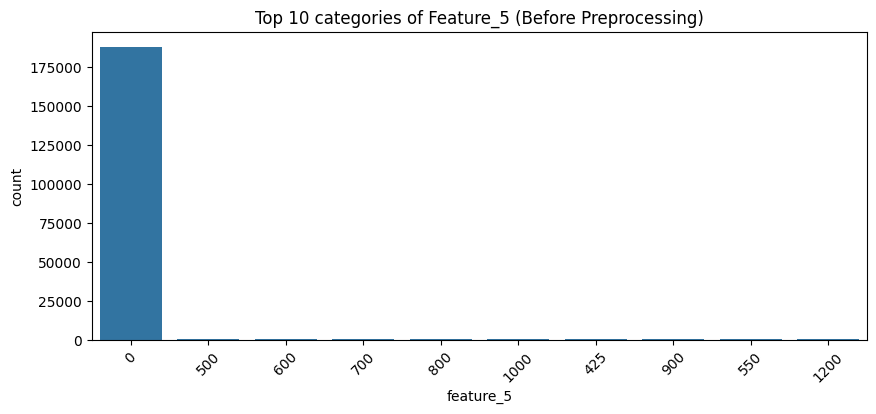

In [21]:
# 3. Countplot of categorical feature (feature_5)
plt.figure(figsize=(10,4))
top10 = train_df['feature_5'].value_counts().head(10).index
sns.countplot(data=train_df[train_df['feature_5'].isin(top10)], 
              x='feature_5', order=top10)
plt.title("Top 10 categories of Feature_5 (Before Preprocessing)")
plt.xticks(rotation=45)
plt.show()

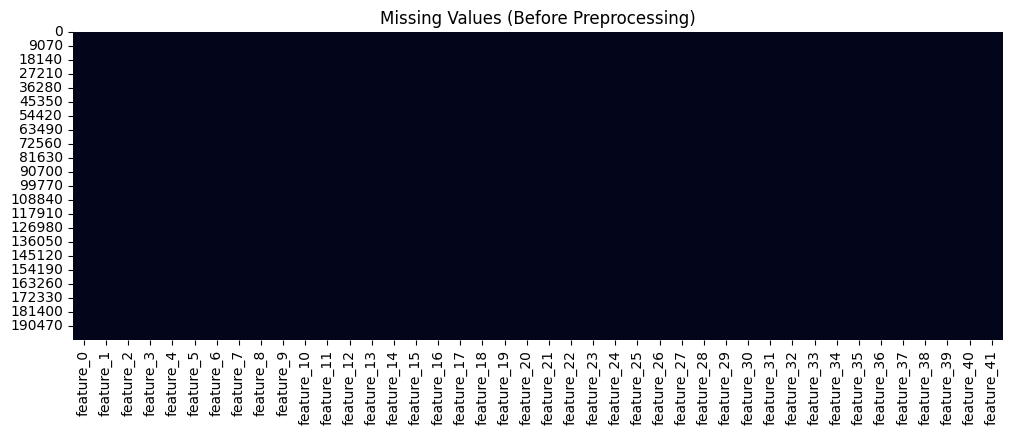

In [22]:
# 4. Missing values heatmap
plt.figure(figsize=(12,4))
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Missing Values (Before Preprocessing)")
plt.show()

In [24]:
# =====================================================
# Step 3: Data Cleaning / Preprocessing
# =====================================================

from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display

# 1. Handle missing values

# Categorical → fill with mode
for col in train_df.select_dtypes(include=["object"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Numeric → fill with median
for col in train_df.select_dtypes(include=["int64", "float64"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# 2. Encode categorical features
le = LabelEncoder()
for col in train_df.select_dtypes(include=["object"]).columns:
    train_df[col] = le.fit_transform(train_df[col])

# 3. Scale numeric features
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

# 4. Show final cleaned dataset (first 10 rows as proper table)
print("Dataset Shape After Preprocessing:", train_df.shape)
display(train_df.head(10))


Dataset Shape After Preprocessing: (199523, 42)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41
0,1.725879,-0.439146,-0.849740,-0.782235,0.476524,-0.201629,0.244533,2.126157,0.207994,-0.097301,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,-0.949346,1.000657,-0.257224
1,1.053560,2.275109,-0.628343,1.570028,1.447186,-0.201629,0.244533,-2.134072,-1.884785,0.546914,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,1.180804,-0.999344,-0.257224
2,-0.739291,-0.439146,-0.849740,-0.782235,-2.435461,-0.201629,-2.426254,0.706081,0.207994,-0.097301,...,0.520254,0.513848,0.427184,-3.254776,-0.316851,0.060524,0.569799,-0.949346,1.000657,-0.257224
3,-1.142682,-0.439146,-0.849740,-0.782235,-0.008807,-0.201629,0.244533,0.706081,0.207994,-0.097301,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,-1.779077,-0.949346,-0.999344,-0.257224
4,-1.097861,-0.439146,-0.849740,-0.782235,-0.008807,-0.201629,0.244533,0.706081,0.207994,-0.097301,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,-1.779077,-0.949346,-0.999344,-0.257224
5,0.605347,0.465605,1.364231,-0.090393,1.447186,4.163662,0.244533,-0.713995,-1.466230,1.191129,...,-0.423967,0.417497,0.304933,0.343561,3.295258,0.060524,0.569799,1.180804,1.000657,-0.257224
6,0.336419,0.465605,1.032136,-0.574682,-0.251472,-0.201629,0.244533,-0.713995,-1.256952,-1.385731,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,1.180804,-0.999344,-0.257224
7,-0.291078,0.465605,-0.628343,1.985133,0.476524,-0.201629,0.244533,0.706081,-1.884785,-0.741516,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,0.279586,1.000657,-0.257224
8,0.560526,-2.248650,1.530279,1.016554,1.447186,2.985034,0.244533,-0.713995,-1.675507,-2.029946,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,1.180804,1.000657,-0.257224
9,-0.022151,0.465605,-0.628343,1.777580,1.447186,-0.201629,0.244533,-0.713995,-1.884785,-0.419408,...,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,1.180804,-0.999344,-0.257224


Summary Statistics After Preprocessing:

               count          mean       std       min       25%       50%  \
feature_0   199523.0  3.703655e-17  1.000003 -1.546074 -0.873755 -0.066972   
feature_1   199523.0  1.061240e-16  1.000003 -3.153402 -0.439146 -0.439146   
feature_2   199523.0 -4.843242e-18  1.000003 -0.849740 -0.849740 -0.849740   
feature_3   199523.0  3.162352e-17  1.000003 -0.782235 -0.782235 -0.782235   
feature_4   199523.0 -1.159529e-16  1.000003 -2.435461 -0.251472 -0.008807   
feature_5   199523.0 -1.196566e-17  1.000003 -0.201629 -0.201629 -0.201629   
feature_6   199523.0  2.051968e-16  1.000003 -5.097042  0.244533  0.244533   
feature_7   199523.0 -1.316222e-16  1.000003 -2.134072 -0.713995  0.706081   
feature_8   199523.0  1.150982e-16  1.000003 -2.721897 -0.419840  0.207994   
feature_9   199523.0  1.509952e-17  1.000003 -2.029946 -0.097301 -0.097301   
feature_10  199523.0 -1.460095e-16  1.000003 -4.222862  0.412334  0.412334   
feature_11  199523.0  6

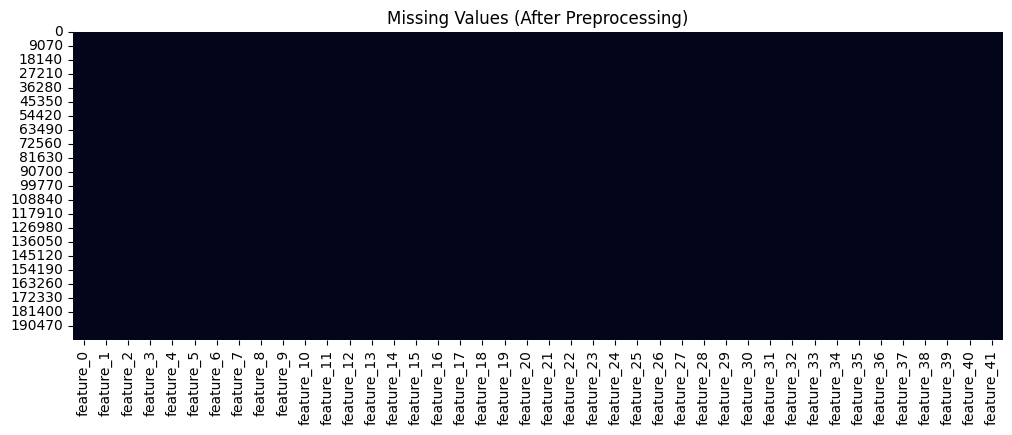

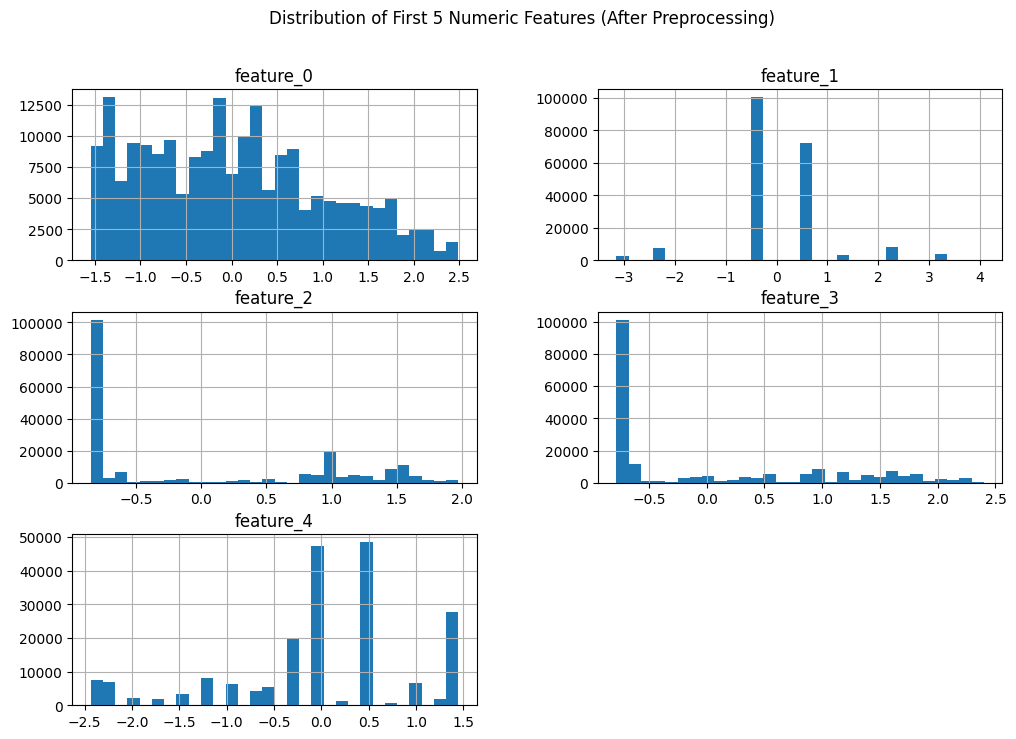

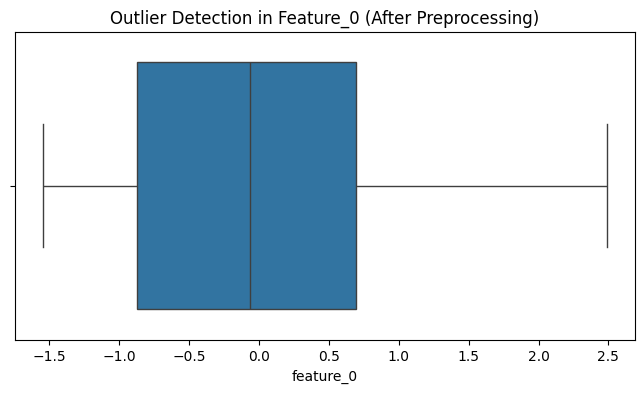

In [25]:
# =====================================================
# Step 4: EDA After Preprocessing
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics
print("Summary Statistics After Preprocessing:\n")
print(train_df.describe().T)

# 2. Missing Values Check
print("\nMissing Values After Preprocessing:\n")
print(train_df.isnull().sum())

plt.figure(figsize=(12,4))
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Missing Values (After Preprocessing)")
plt.show()

# 3. Distribution plots for first 5 numeric features
train_df.iloc[:, :5].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of First 5 Numeric Features (After Preprocessing)")
plt.show()

# 4. Boxplot for outlier detection (Optional but useful)
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df['feature_0'])
plt.title("Outlier Detection in Feature_0 (After Preprocessing)")
plt.show()


----- EDA Before Preprocessing -----

Summary Statistics (Before):
                count         mean          std    min       25%      50%  \
feature_0   199523.0    34.494199    22.310895   0.00    15.000    33.00   
feature_2   199523.0    15.352320    18.067129   0.00     0.000     0.00   
feature_3   199523.0    11.306556    14.454204   0.00     0.000     0.00   
feature_5   199523.0    55.426908   274.896454   0.00     0.000     0.00   
feature_16  199523.0   434.718990  4697.531280   0.00     0.000     0.00   
feature_17  199523.0    37.313788   271.896428   0.00     0.000     0.00   
feature_18  199523.0   197.529533  1984.163658   0.00     0.000     0.00   
feature_24  199523.0  1740.380269   993.768156  37.87  1061.615  1618.31   
feature_30  199523.0     1.956180     2.365126   0.00     0.000     1.00   
feature_36  199523.0     0.175438     0.553694   0.00     0.000     0.00   
feature_38  199523.0     1.514833     0.851473   0.00     2.000     2.00   
feature_39  199523.0

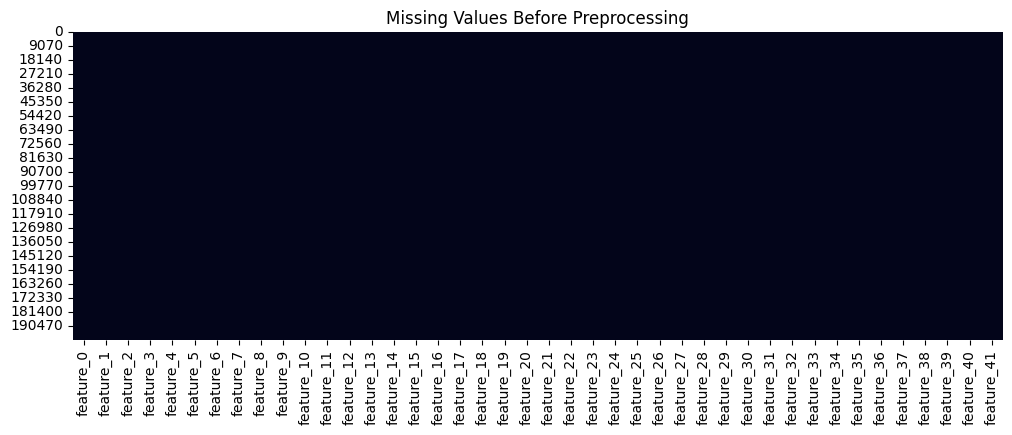

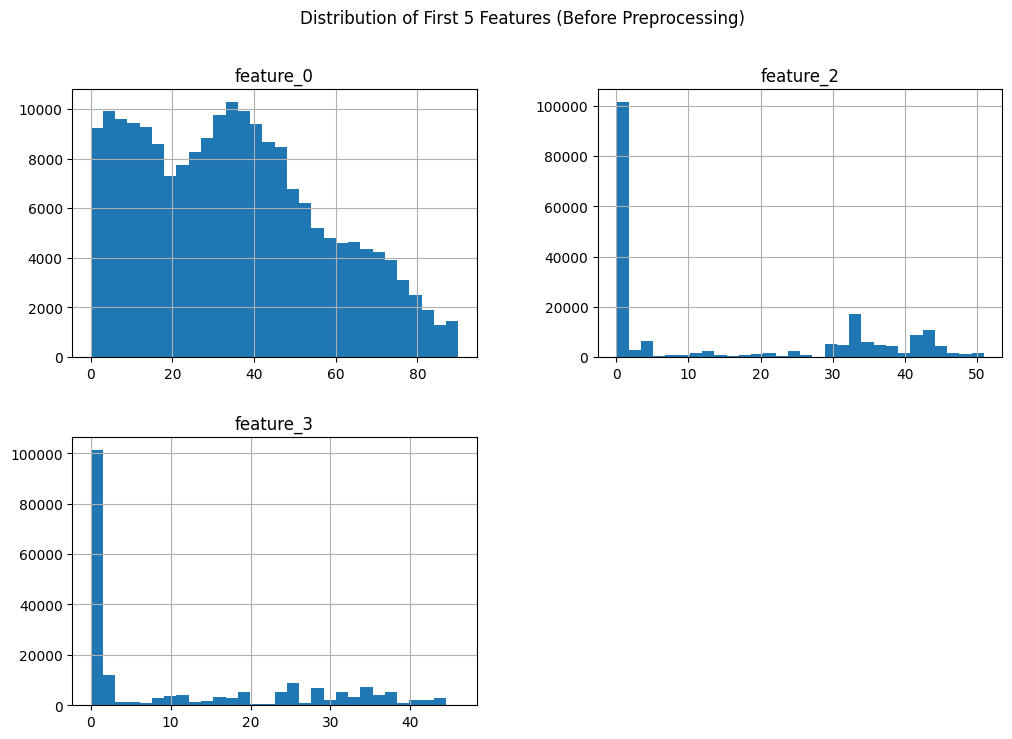


----- EDA After Preprocessing -----

Summary Statistics (After):
                count          mean       std       min       25%       50%  \
feature_0   199523.0  3.703655e-17  1.000003 -1.546074 -0.873755 -0.066972   
feature_1   199523.0  1.061240e-16  1.000003 -3.153402 -0.439146 -0.439146   
feature_2   199523.0 -4.843242e-18  1.000003 -0.849740 -0.849740 -0.849740   
feature_3   199523.0  3.162352e-17  1.000003 -0.782235 -0.782235 -0.782235   
feature_4   199523.0 -1.159529e-16  1.000003 -2.435461 -0.251472 -0.008807   
feature_5   199523.0 -1.196566e-17  1.000003 -0.201629 -0.201629 -0.201629   
feature_6   199523.0  2.051968e-16  1.000003 -5.097042  0.244533  0.244533   
feature_7   199523.0 -1.316222e-16  1.000003 -2.134072 -0.713995  0.706081   
feature_8   199523.0  1.150982e-16  1.000003 -2.721897 -0.419840  0.207994   
feature_9   199523.0  1.509952e-17  1.000003 -2.029946 -0.097301 -0.097301   
feature_10  199523.0 -1.460095e-16  1.000003 -4.222862  0.412334  0.412334 

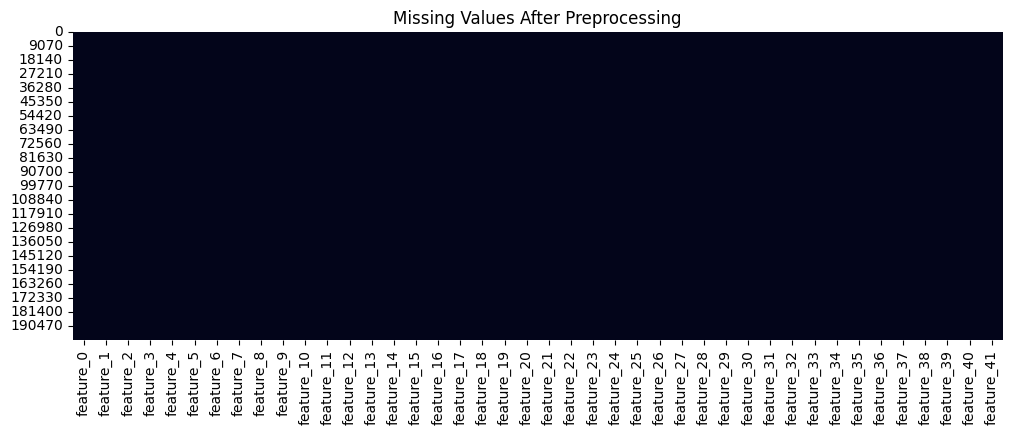

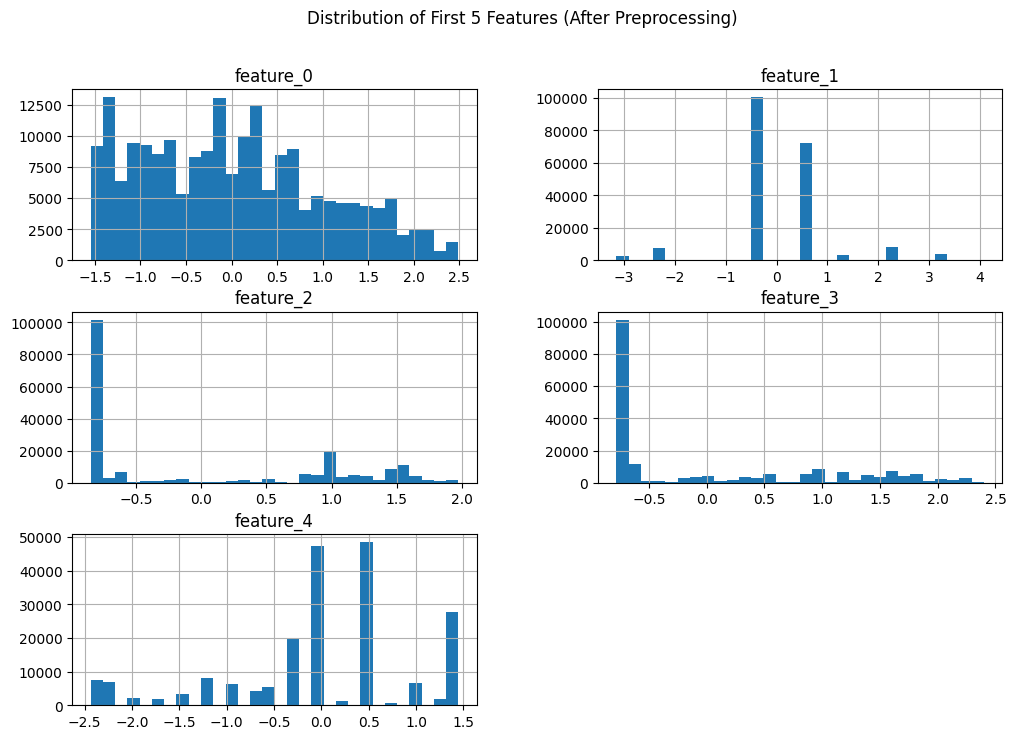

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Step 1: Load Dataset (Raw Form)
# ================================
df_raw = pd.read_csv(
    r"C:\Users\Hifza\Music\MSDS\Data Science Tools & Techniques\25I-8044\census+income+kdd\census-income.data",
    header=None
)

df_raw.columns = [f"feature_{i}" for i in range(df_raw.shape[1])]

# Make a copy for preprocessing later
df_clean = df_raw.copy()

# ================================
# Step 2: EDA Before Preprocessing
# ================================
print("----- EDA Before Preprocessing -----\n")

# Summary statistics
print("Summary Statistics (Before):\n", df_raw.describe().T)

# Missing values check
print("\nMissing Values (Before):\n", df_raw.isnull().sum())

# Missing values heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Missing Values Before Preprocessing")
plt.show()

# Distribution of first 5 features
df_raw.iloc[:, :5].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of First 5 Features (Before Preprocessing)")
plt.show()

# ================================
# Step 3: Preprocessing
# ================================

# Handle missing values
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Encode categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Scale numeric features
scaler = StandardScaler()
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# ================================
# Step 4: EDA After Preprocessing
# ================================
print("\n----- EDA After Preprocessing -----\n")

# Summary statistics
print("Summary Statistics (After):\n", df_clean.describe().T)

# Missing values check
print("\nMissing Values (After):\n", df_clean.isnull().sum())

# Missing values heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df_clean.isnull(), cbar=False)
plt.title("Missing Values After Preprocessing")
plt.show()

# Distribution of first 5 features
df_clean.iloc[:, :5].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of First 5 Features (After Preprocessing)")
plt.show()
